# Import Libraries

In [1]:
#import libraraies
import pandas as pd
import matplotlib.pyplot as plt
import re  
import numpy as np

# Read in Data

In [2]:
#Read in the data.
df = pd.read_csv(r'C:\Users\Brian\Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 6384)

# Suicides by year 

In [3]:
#Suicides by year
df_year = df[['YEAR','ESTIMATE']]

df_year = df_year.drop_duplicates()

df_year = df_year.groupby(['YEAR'])['ESTIMATE'].sum().reset_index(name="suicides")

### Graphs 

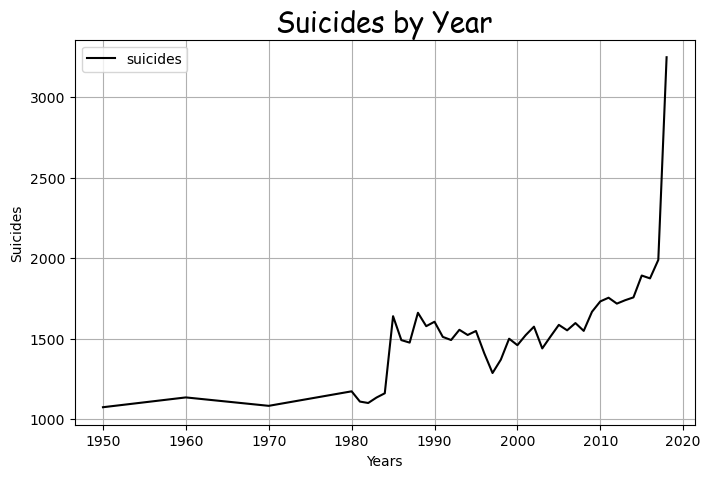

In [4]:
#Create Figure size
plt.figure(figsize=(8,5), dpi=100) #Must be done before creation

#Plot line
plt.plot(df_year[['YEAR']],df_year[['suicides']], 'k-', label='suicides') #Short hand table creation arguments

# Add a title (specify font parameters with fontdict)
plt.title('Suicides by Year', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Years')
plt.ylabel('Suicides')

#Add grid lines
plt.grid()

# Add a legend
plt.legend()

#Show Graph
plt.show()

# Suicides by age

In [5]:
#Suicides by age
df_age = df[['AGE','ESTIMATE']]

#Drop duplicates
df_age = df_age.drop_duplicates()

#Do the sum for age categories
df_age = df_age.groupby(['AGE'])['ESTIMATE'].sum().reset_index(name="suicides")

#List of rows to keep.
rows = ['10-14 years','15-24 years','25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','75-84 years','85 years and over']

#Filter down rows.
df_age = df_age[df_age['AGE'].isin(rows)]

#Creates new age column without the words.
new_column = []    
for values in df_age['AGE']:
    new_column.append(re.search(r'\d+\-*\d*', values).group())

df_age['age_clean'] = new_column

### Graphs

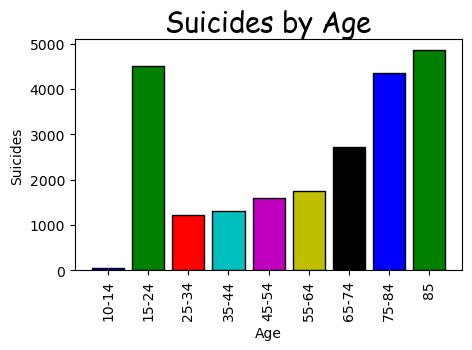

In [6]:
# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

colors = ['b','g','r','c','m','y','k','b','g']

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(df_age['age_clean'],df_age['suicides'],color=colors,edgecolor='k')

#Rotate x labels
plt.xticks(rotation=90)


# Add a title (specify font parameters with fontdict)
plt.title('Suicides by Age', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Age')
plt.ylabel('Suicides')

# Show plot
plt.show()





# Suicides by demographic

In [7]:
#Suicides by age
df_label = df[['STUB_LABEL','ESTIMATE']]

#Remove duplicates
df_label = df_label.drop_duplicates()

#Group by and roll up.
df_label = df_label.groupby(['STUB_LABEL'])['ESTIMATE'].sum().reset_index(name="suicides")

#Age Filter
def split_it(age):
    return re.findall(':*(\d\d-*\d*\d*.*)',age)
    
df_label['age'] = df_label['STUB_LABEL'].apply(lambda x: split_it(x))

#Gender Female column
def split_it(gender):
    return re.findall('(Female)',gender)
    
df_label['Female'] = df_label['STUB_LABEL'].apply(lambda x: split_it(x))

#Gender Male
def split_it(gender):
    return re.findall('(Male)',gender)
    
df_label['Male'] = df_label['STUB_LABEL'].apply(lambda x: split_it(x))


#Strip brackets from the columns
df_label['Male'] = df_label['Male'].str[0]
df_label['Female'] = df_label['Female'].str[0]
df_label['age'] = df_label['age'].str[0]

#Create Gender column from the split columns
df_label['Gender'] = np.where(df_label['Female'] == 'Female',df_label['Female'] ,df_label['Male'])


#Race
def split_it(race):
    return re.findall(':(.+):',race)
    
df_label['Race'] = df_label['STUB_LABEL'].apply(lambda x: split_it(x))

#Drop boxes
df_label['Race'] = df_label['Race'].str[0]

#Filter down columns
df_label = df_label[[ 'Race', 'Gender','age', 'suicides']]

#List of race and age rows to keep
ages_to_keep = ('15-24 years','25-44 years','45-64 years','65 years and over')
races_to_keep = (' White',' Black or African American',' Asian or Pacific Islander',' American Indian or Alaska Native',' Hispanic or Latino: All races')

#Cleaning up data
df_races_clean = df_label[df_label['Race'].isin(races_to_keep)]
df_races_clean = df_races_clean[df_races_clean['age'].isin(ages_to_keep)]

#Rolling up data
suicides_by_race_and_gender = df_races_clean.groupby(['Race','Gender'])['suicides'].sum().reset_index(name="suicides")

#Add join key
suicides_by_race_and_gender['join'] = '1'

#get sum
total_suicides = suicides_by_race_and_gender.groupby(['join'])['suicides'].sum().reset_index(name="total_suicides")

#Joining total row to database
suicides_by_race_and_gender = suicides_by_race_and_gender.merge(total_suicides,on='join')

#Percent of total suicides
suicides_by_race_and_gender['percent_of_suicides'] = (suicides_by_race_and_gender['suicides'] / suicides_by_race_and_gender['total_suicides']) * 100

suicides_by_race_and_gender['combined_label'] = suicides_by_race_and_gender['Race'] + ' ' + suicides_by_race_and_gender['Gender']

### Graphs 

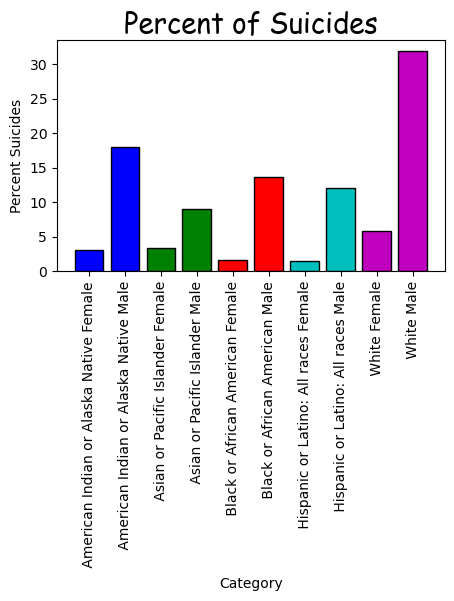

In [8]:
# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

colors = ['b','b','g','g','r','r','c','c','m','m']

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(suicides_by_race_and_gender['combined_label'],suicides_by_race_and_gender['percent_of_suicides'],color=colors,edgecolor='k')

#Rotate x labels
plt.xticks(rotation=90)


# Add a title (specify font parameters with fontdict)
plt.title('Percent of Suicides', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Category')
plt.ylabel('Percent Suicides')

# Show plot
plt.show()

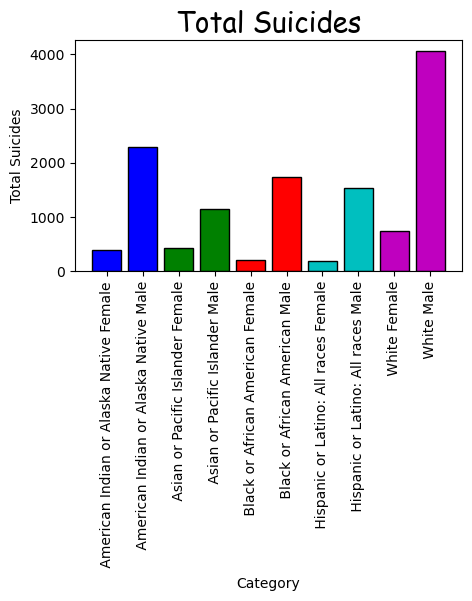

In [9]:
# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

colors = ['b','b','g','g','r','r','c','c','m','m']

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(suicides_by_race_and_gender['combined_label'],suicides_by_race_and_gender['suicides'],color=colors,edgecolor='k')

#Rotate x labels
plt.xticks(rotation=90)


# Add a title (specify font parameters with fontdict)
plt.title('Total Suicides', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Category')
plt.ylabel('Total Suicides')

# Show plot
plt.show()

# Suicides by Race

In [10]:
suicides_by_race = df_races_clean.groupby(['Race'])['suicides'].sum().reset_index(name="suicides")

### Graphs 

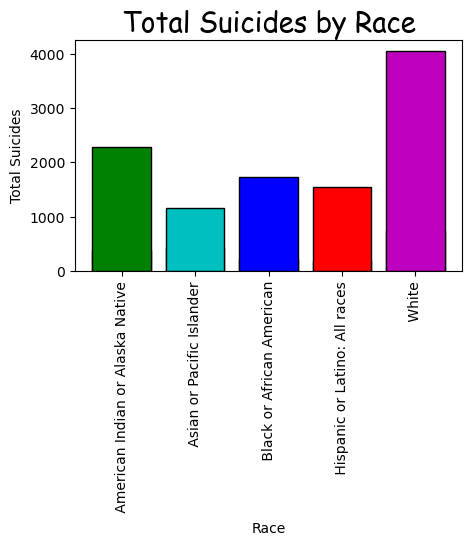

In [11]:
# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

colors = ['b','g','r','c','m']

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(suicides_by_race_and_gender['Race'],suicides_by_race_and_gender['suicides'],color=colors,edgecolor='k')

#Rotate x labels
plt.xticks(rotation=90)


# Add a title (specify font parameters with fontdict)
plt.title('Total Suicides by Race', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Race')
plt.ylabel('Total Suicides')

# Show plot
plt.show()

# Suicides by Gender

In [12]:
suicides_by_gender = df_races_clean.groupby(['Gender'])['suicides'].sum().reset_index(name="suicides")

### Graphs 

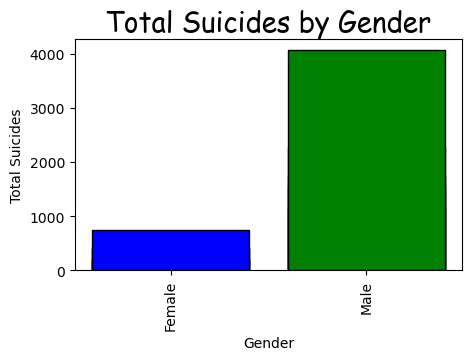

In [13]:
# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

colors = ['b','g']

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(suicides_by_race_and_gender['Gender'],suicides_by_race_and_gender['suicides'],color=colors,edgecolor='k')

#Rotate x labels
plt.xticks(rotation=90)


# Add a title (specify font parameters with fontdict)
plt.title('Total Suicides by Gender', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Gender')
plt.ylabel('Total Suicides')

# Show plot
plt.show()